In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

Write a function that takes as input two lists of numeric data and computes the least squares coefficients for a quadratic fit of the data. You will need to form the 3X3 matrix and the 3X1 column vector shown and on the previous slide. Use the same function that you used before when performing a linear least squares fit to invert the matrix and multiple the column vector. Use the data below to test your function.

In [2]:
xlist1 =[-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0]
ylist1 = [10.0,6.0,2.0,1.0,0.0,2.0,4.0,7.0]

x_ar = np.array(xlist1)
y_ar = np.array(ylist1)

In [3]:
def least_line(x, y):
    x_sq = (x**2).sum()
    x_sum = x.sum()
    n = len(x)
    sum_xy = (x*y).sum()
    y_sum = y.sum()
    
    arr1 = [[x_sq, x_sum], [x_sum, n]]
    arr2 = [sum_xy, y_sum]
    
    answer = np.linalg.solve(arr1, arr2)
    return answer

def least_quad(x, y):
    x_4 = (x**4).sum()
    x_3 = (x**3).sum()
    x_sq = (x**2).sum()
    x_sum = x.sum()
    n = len(x)
    sum_xy = (x*y).sum()
    sum_sq = ((x**2)*y).sum()
    y_sum = y.sum()
    
    arr1 = [[x_4, x_3,x_sq], [x_3,x_sq,x_sum],[x_sq,x_sum,n]]
    arr2 = [sum_sq, sum_xy, y_sum]
    
    answer = np.linalg.solve(arr1, arr2)
    return answer

def slope_to_points(slope, intercept, point_nums):
    list_x = []
    list_y = []
    for num in point_nums:
        list_x.append(num)
        y_point = slope * num + intercept
        list_y.append(y_point)
    return list_x, list_y

def mean(data):
    sum = 0
    for val in data:
        sum += val
    average = sum/len(data)
    return average

def variance(data):
    sum = 0
    for num in data:
        sum += (num - mean(data))**2
    vari = sum/len(data)
    return vari

def stand_dev(data):
    de = math.sqrt(variance(data))
    return de

def residuals(x_list, y_list, slope, intercept):
    res_list = []

    for item in range(0,len(x_list)):
        res = y_list[item] - (slope * x_list[item] + intercept)
        res_list.append(res)
        
    res_mean = mean(res_list)
    res_deviation = stand_dev(res_list)
    
    return res_list, res_mean, res_deviation

def line_graph(x_list, y_list, x_label = None, y_label = None, amount=1, colour='blue', mark="o", line='-'):
    '''amount is number of lines on a graph. if the amount is greater than one, submit lists of lists for the other three paramters. ex: amount=1, x_list=[1,2,3] or amount=2, x_list=[[1,2,3],[4,5,6]]'''
    if amount >1:
        for num in range(0, amount):
            plt.plot(x_list[num], y_list[num], color=colour[num], marker=mark[num], linestyle=line[num])
    else:
        plt.plot(x_list, y_list, color=colour, marker=mark, linestyle=line)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [4]:
x2,xcon, con = least_quad(x_ar,y_ar)
print(x2,xcon, con)

0.6666666666666662 -3.7142857142857117 5.619047619047618


Write a function that plots the set of points used for the fit, the least squares fit, and the error bars based on the fit residuals. Use the data below to test your code. Approximate values for the least squares quadratic coefficients and a figure showing what the plot should look like are provided below.
* y = ax^2 + bx + c

In [5]:
def quad_line(a,b,c,points):
    list_x = []
    list_y = []
    for num in points:
        list_x.append(num)
        y_point = (a*(num**2)) + (b*num) + c
        list_y.append(y_point)
    return list_x, list_y

In [6]:
xes, yes = quad_line(x2,xcon, con, xlist1)
print(xes, yes)

[-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0] [9.999999999999996, 5.619047619047618, 2.571428571428572, 0.8571428571428585, 0.47619047619047805, 1.4285714285714297, 3.7142857142857126, 7.3333333333333295]


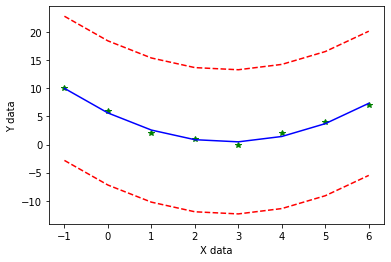

In [7]:
confidence = 1

res, resmean, resdev = residuals(xes,yes,(x2 + xcon), con)

ubx, uby = quad_line(x2, xcon, con + (resmean + confidence * resdev), xlist1)
lbx, lby = quad_line(x2, xcon, con - (resmean + confidence * resdev), xlist1)

line_graph([xlist1, xes, ubx, lbx], [ylist1, yes, uby, lby], x_label = "X data", y_label = "Y data", amount=4, colour=['green', 'blue', 'red', 'red'], mark=['*', "","", ''], line=['', '-', '--', '--'])